## **Top Selling Amazon Books (2009-2019)**

#### This dataset contains information about top selling books of Amazon(550 books) either belonging to fiction or non-fiction.

#### FEATURES:

**Name** - Name of the Book

**Author** - The author of the Book

**User Rating** - Amazon User Rating

**Reviews** - Number of written reviews on amazon

**Price** - The price of the book 

**Year** - The Year it ranked on the bestseller

**Genre** - Whether fiction or non-fiction

### 1. Importing Libraries:

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors 
from matplotlib.gridspec import GridSpec
import plotly as py
import plotly.graph_objs as go


### 2. Loading the Dataset:

In [2]:
df = pd.read_csv("../files/bestsellers1.csv",index_col=0)
df.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


### 3. Analysis and Visualization

In [3]:
df['genre'].value_counts()

Non Fiction    191
Fiction        160
Name: genre, dtype: int64

In [4]:
# check average rating of each genre

df.groupby('genre')['user_rating'].mean()

genre
Fiction        4.615625
Non Fiction    4.603141
Name: user_rating, dtype: float64

- With the two queries above, we see that in the bestseller list for the entire decade, there are more nonfiction books, but fiction books have higher votes.

#### 1. Show the relationship between the year of publication and the genre.

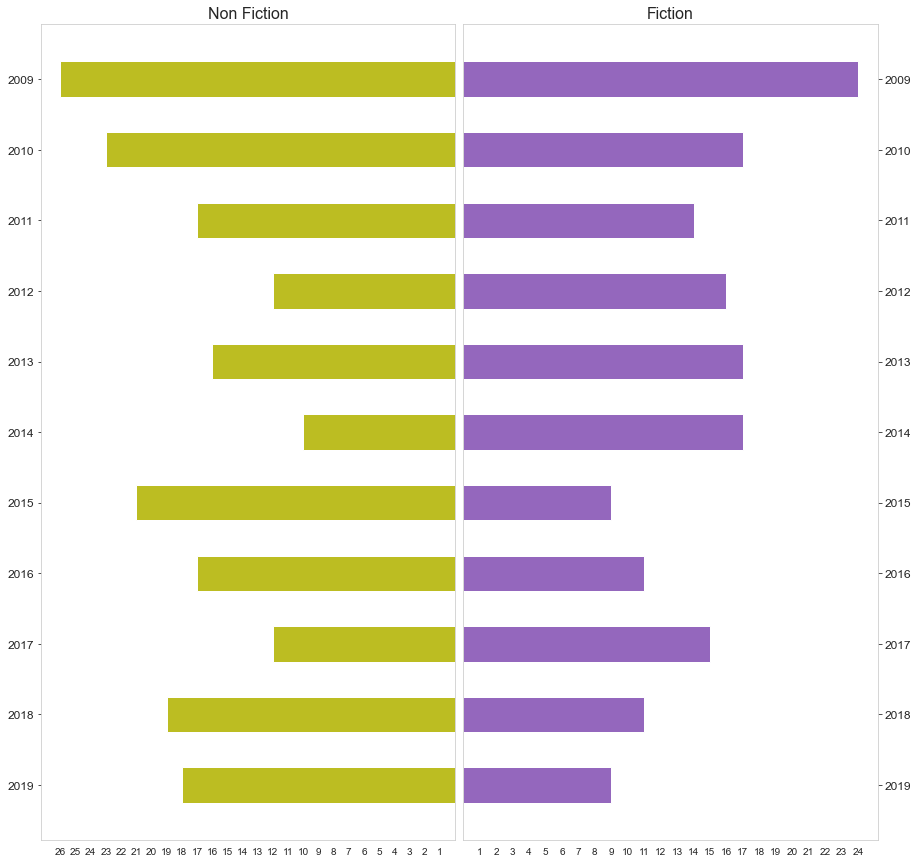

In [5]:
best_nf_books = df.groupby(['year', 'genre']).count().unstack()['name']['Non Fiction'].sort_values(ascending=False)
best_f_books = df.groupby(['year', 'genre']).count().unstack()['name']['Fiction'].sort_values(ascending=False)

color=sns.color_palette('viridis')

sns.set_style('whitegrid')

fig,axes = plt.subplots(1,2,figsize=(15,15))

plt.subplots_adjust(wspace=0.02)

axes[0].invert_xaxis()
axes[0].invert_yaxis()
axes[0].yaxis.tick_left()
axes[0].grid(None)


axes[0].set_xticks(range(1,int(best_nf_books.values.max())+1))
axes[0].barh(y=best_nf_books.index,width=best_nf_books.values,height=0.5,tick_label=best_nf_books.index,color= 'C8')
axes[0].set_yticklabels(best_nf_books.index,fontsize=12)
axes[0].set_title('Non Fiction',fontdict={'size':16})

axes[1].invert_yaxis()
axes[1].yaxis.tick_right()
axes[1].grid(None)


axes[1].set_xticks(range(1,int(best_f_books.values.max())+1))
axes[1].barh(y=best_f_books.index,width=best_f_books.values,height=0.5,tick_label=best_f_books.index,color='C4')
axes[1].set_yticklabels(best_f_books.index,fontsize=12)
axes[1].set_title('Fiction', fontdict={'size':16})

plt.savefig("../graphics/genre.png")
plt.show()

- The proportion of Fiction Books are always higher compared to Non Fiction Books throughout the year. Only in 2014, the proportion of Non Fiction Books is higher compared to Fiction Books.

#### 2. How many books are there by each author?

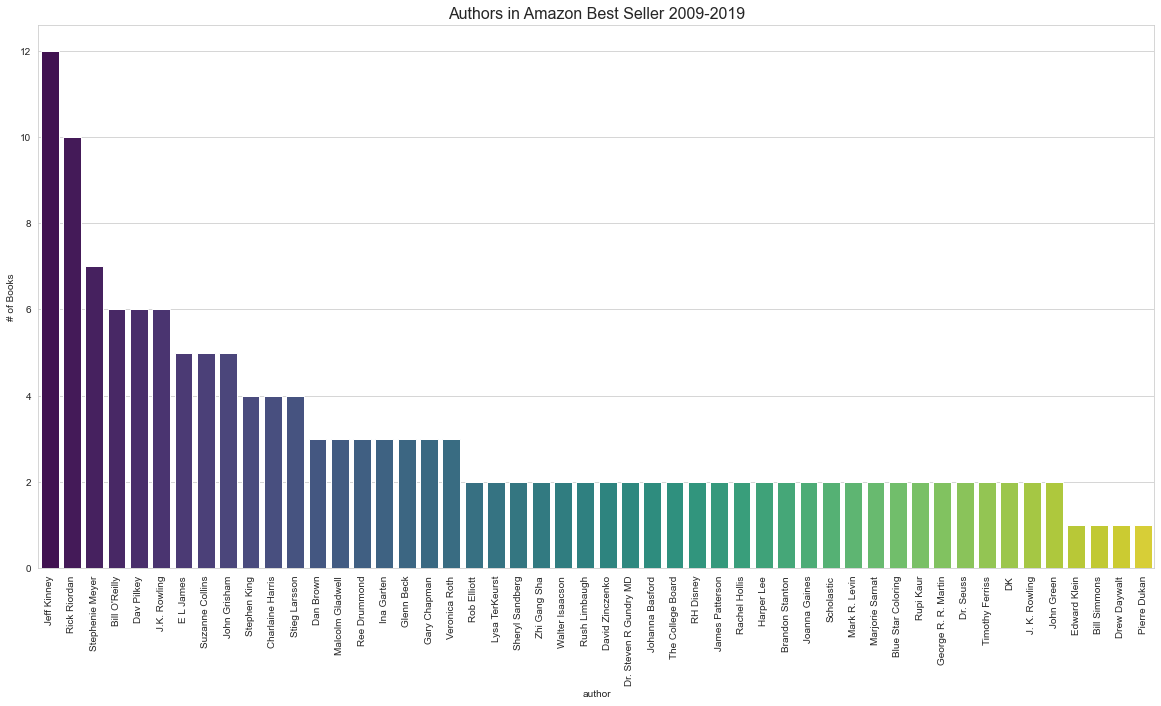

In [6]:
fig = plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(data = df , x =df['author'] ,palette='viridis',order=df['author'].value_counts().index[0:50])
plt.title("Authors in Amazon Best Seller 2009-2019", fontsize=16)
plt.ylabel('# of Books')

plt.savefig("../graphics/books-author.png")
plt.show()

#### 2.1 Who have been the most successful authors?

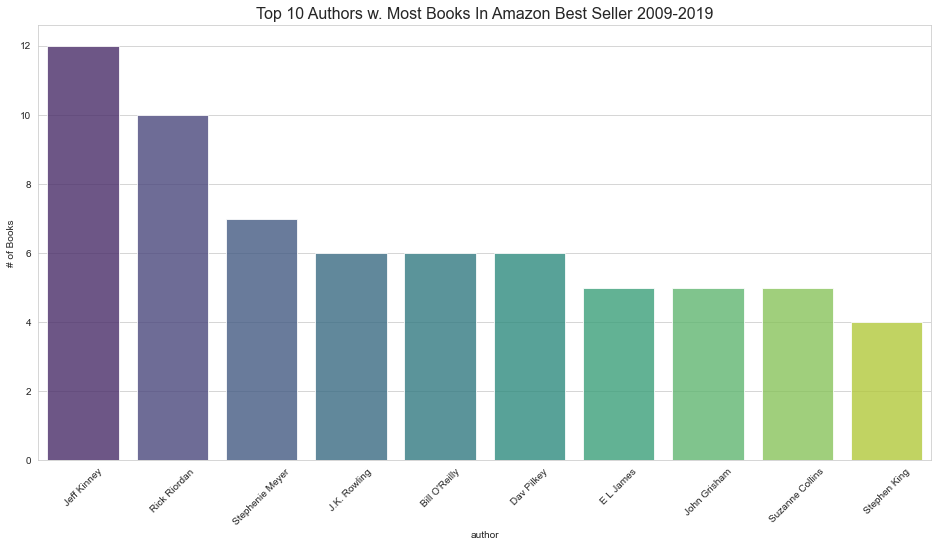

In [7]:
top10 = df.value_counts('author')
top10 = top10[:10,]
plt.figure(figsize=(16, 8))
sns.barplot(x = top10.index, y = top10.values, alpha=0.8, palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Authors w. Most Books In Amazon Best Seller 2009-2019', fontsize=16)
plt.ylabel('# of Books')

plt.savefig("../graphics/top-authors.png")
plt.show();

#### 3. What books have been the best valued by users?

In [8]:
maxim = df[(df["user_rating"] == 4.9)]
orden_maxim = maxim.sort_values(by = "reviews", ascending = False)
orden_maxim

,name,author,user_rating,reviews,price,year,genre
245,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2012,Fiction
153,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,4.9,19622,30,2016,Fiction
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction
476,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2013,Fiction
40,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2017,Fiction
85,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,4.9,12619,8,2019,Fiction
207,Last Week Tonight with John Oliver Presents A ...,Jill Twiss,4.9,11881,13,2018,Fiction
157,Harry Potter and the Sorcerer's Stone: The Ill...,J.K. Rowling,4.9,10052,22,2016,Fiction
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
303,Strange Planet (Strange Planet Series),Nathan W. Pyle,4.9,9382,6,2019,Fiction


#### 4. Show the relationship between rating and time.

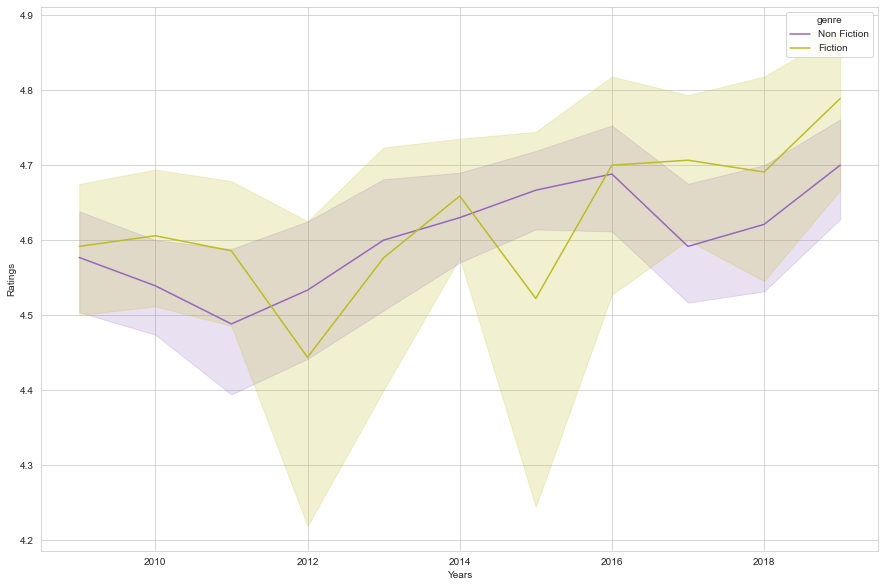

In [9]:
fig = plt.figure(figsize=(15,10))

sns.lineplot(y=df.user_rating, x=df.year, hue=df.genre, palette=["C4", "C8"])
plt.ylabel("Ratings")

plt.savefig("../graphics/year-rating-relationship.png")
plt.xlabel("Years");

- Most of the books received ratings between 4.5 to 4.9, but despite a drop in 2012, the votes have been rising over the years.

#### 5. Show the outliers by price.

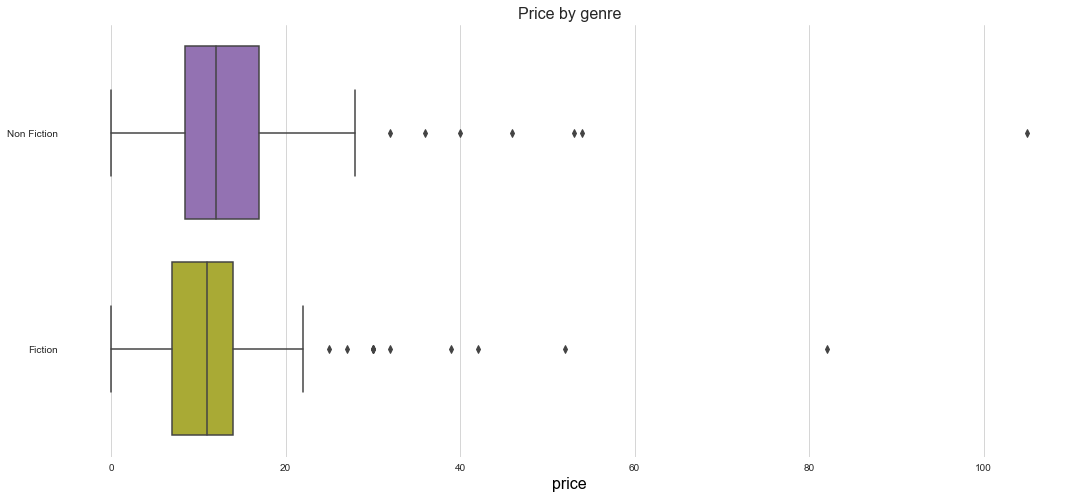

In [10]:
fig = plt.figure(figsize=(14,6))

axes = fig.add_axes([0,0,1,1])

sns.boxplot(x=df['price'], y=df['genre'], palette=["C4", "C8"], ax=axes)

axes.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

axes.set_xlabel('price', fontsize=16, color='black')
axes.set_ylabel('')

plt.title("Price by genre", fontsize=16)

plt.savefig("../graphics/price.png")
plt.show()

- The price of best seller book normally ranged from from $7–$15, with median around $11. 

### 4. Conclusion

In the course of the analysis, it was established which authors have been the most successful, how many books are there by each author, which books receive the best reviews from readers. In addition, it was found that non-fiction literature is becoming more often a bestseller, but users also like fiction more.

Price is varied from $7–$15, with median around $11. Since the context of the EDA is related to Best Seller Books, the rating range is high around 4–5 and has high review numbers also, around 8000 reviews in average.